# Part II - Ford GoBike System Data
## by Ana Moreira

## Investigation Overview


> The bike sharing system is by far, more used by men on their 30's, than women or other gender. Men travells shorter trips (in average).

> Most of the users are subscribers, who travell at labour days and in the peak hours: 8am-9am and 17pm-18pm. 

> Customers, differently of subscribers, travell more at the weekends, for leisure purpose. They travell longer times and distances then subscribers and the peak hours is more spread.

> The average age of the members is 34 years old.

> I didn't find any linear relationship between age and distance or duration of the trip.


## Dataset Overview and Executive Summary

> > This dataset collects data from the S.Francisco Bay Area bike-sharing system rides in February 2019. It contains information about the users, like age, gender and type of user: customer or subscriber. It also contains information about the trips: coordinates of start and ending point (which allow to calculate distance) and duration of each trip.


In [27]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [31]:
# load in the dataset into a pandas dataframe
bikes=pd.read_csv("bikes_final.csv")

## (Visualization 1)

> The visualization 1 will show the impact of the weekday on duration and distance travelled bythe different type of users.

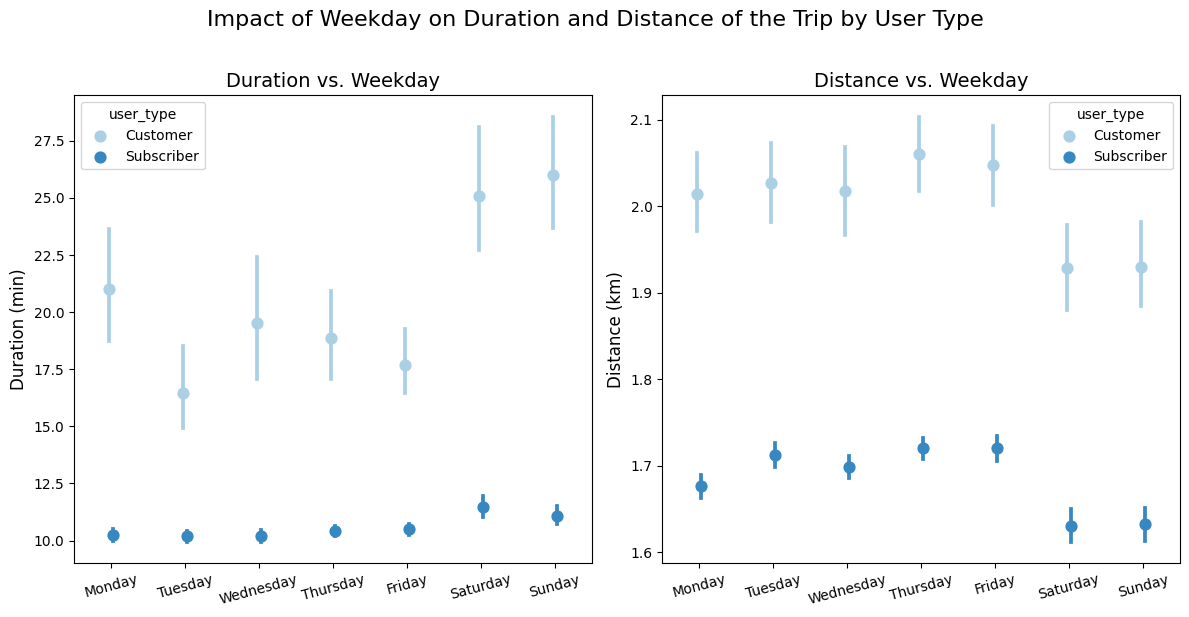

In [32]:
# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set a reasonable figure size
plt.figure(figsize=(12, 6))

# Create subplots
plt.subplot(1, 2, 1)
ax1 = sns.pointplot(data=bikes, x='start_weekday', y='duration_min', hue='user_type',
                    palette='Blues', linestyles='', dodge=True, order=weekday_order)
ax1.set_title('Duration vs. Weekday', fontsize=14)
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('Duration (min)', fontsize=12)
plt.xticks(rotation = 15)

plt.subplot(1, 2, 2)
ax2 = sns.pointplot(data=bikes, x='start_weekday', y='distance', hue='user_type',
                    palette='Blues', linestyles='', dodge=True, order=weekday_order)
ax2.set_title('Distance vs. Weekday', fontsize=14)
ax2.set_xlabel('', fontsize=12)
ax2.set_ylabel('Distance (km)', fontsize=12)
plt.xticks(rotation = 15)

# Set the title for the entire FacetGrid with increased font size
plt.suptitle("Impact of Weekday on Duration and Distance of the Trip by User Type", y=1.02, fontsize=16, weight=True)

# Adjust layout
plt.tight_layout()
plt.show();

As shown above: Customers's trips are much longer in terms of distance and duration than subsccribers's, regardless the day of the week.

For both for customers and subscribers, the trips last longer and for shorter distances at the weekends than at labour days, showing that at the weekend, most people use the bikes for leisure time.

## (Visualization 2)

> The visualization 2 will show if there's any linear relationship between distance travelled and age of the user, by gender and user type.

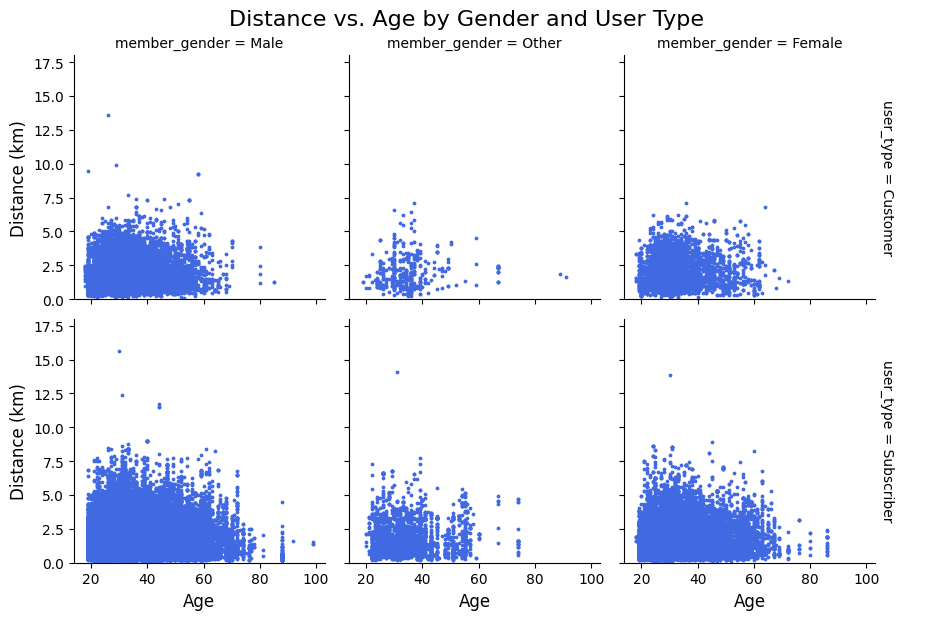

In [33]:
# Scatterplot Distance travelled of each member's age by gender and type of user
g = sns.FacetGrid(data=bikes, col='member_gender', row='user_type', margin_titles=True)
g.map(plt.scatter, 'member_age', 'distance', s=3, color='royalblue')  # Adjust the dot size using 's' parameter and set color

# Set x and y-axis labels for all plots with increased font size
g.set_axis_labels("Age", "Distance (km)", fontsize=12)

# Set y-axis limits for all plots
min_limit = 0
max_limit = 18
g.set(ylim=(min_limit, max_limit))

# Set the title for the entire FacetGrid with increased font size
g.fig.suptitle("Distance vs. Age by Gender and User Type", y=1.02, fontsize=16)

# Add a legend if necessary
g.add_legend()

# Show the plot
plt.show()

There's no linear corelation between age and distance travelled. It's not easy to take accurate and significant conclusions from these plots. However, We can see that between gender, although in average men travell shorter trips, they have a more extended interval of distances travelled than other and female genders, in both type of users, and specially in younger ages (top higher values).

## (Visualization 3)
> The visualization 3 will show if there's any linear relationship between duration of the trip and ange of the user, by gender.

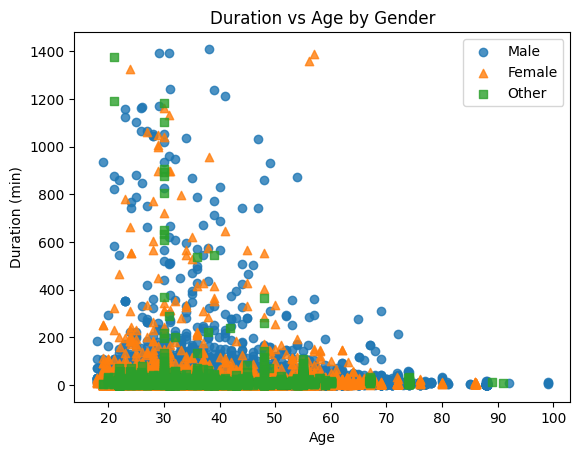

In [34]:
ttype_markers = [['Male', 'o'], 
                 ['Female', '^'],
                ['Other', 's']]

for ttype, marker in ttype_markers:
    plot_data = bikes.loc[bikes['member_gender'] == ttype]
    sns.regplot(data=plot_data, x='member_age', y='duration_min',
                x_jitter=0.04, fit_reg=False, marker=marker);

plt.xlabel('Age')
plt.ylabel('Duration (min)')
plt.title("Duration vs Age by Gender")
plt.legend(['Male', 'Female', 'Other'])
plt.show()

There's no linear relationship between the variables, as shown in the scatter plot.

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
